In [18]:
import os
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline
from wordcloud import WordCloud

In [19]:
pd.set_option('display.max_columns', None)
df_manila = pd.read_csv(r"C:\Users\nicol\OneDrive\Master\Goldsmiths\Thesis\weather-prediction\data\manila_weather_2014-2024.csv")

In [20]:
#sort index
df_manila = df_manila.sort_index()
columns_to_drop = ['Unnamed: 0', 'sunrise', 'sunset']
df_manila = df_manila.drop(columns=columns_to_drop)

## Descriptive statistics and EDA

In [21]:
df_manila.shape

(3793, 31)

In [22]:
df_manila.columns

Index(['name', 'datetime', 'tempmax', 'tempmin', 'temp', 'feelslikemax',
       'feelslikemin', 'feelslike', 'dew', 'humidity', 'precip', 'precipprob',
       'precipcover', 'preciptype', 'snow', 'snowdepth', 'windgust',
       'windspeed', 'winddir', 'sealevelpressure', 'cloudcover', 'visibility',
       'solarradiation', 'solarenergy', 'uvindex', 'severerisk', 'moonphase',
       'conditions', 'description', 'icon', 'stations'],
      dtype='object')

In [23]:
df_manila['datetime'].min()

'2014-01-01'

In [24]:
df_manila['datetime'].max()

'2024-05-20'

In [25]:
df_manila['temp'].min()

22.4

In [26]:
df_manila['temp'].max()

32.9

In [27]:
df_manila.dtypes

name                 object
datetime             object
tempmax             float64
tempmin             float64
temp                float64
feelslikemax        float64
feelslikemin        float64
feelslike           float64
dew                 float64
humidity            float64
precip              float64
precipprob            int64
precipcover         float64
preciptype           object
snow                float64
snowdepth           float64
windgust            float64
windspeed           float64
winddir             float64
sealevelpressure    float64
cloudcover          float64
visibility          float64
solarradiation      float64
solarenergy         float64
uvindex               int64
severerisk          float64
moonphase           float64
conditions           object
description          object
icon                 object
stations             object
dtype: object

In [28]:
df_manila.isna().sum()

name                   0
datetime               0
tempmax                0
tempmin                0
temp                   0
feelslikemax           0
feelslikemin           0
feelslike              0
dew                    0
humidity               0
precip                 0
precipprob             0
precipcover            0
preciptype          1273
snow                 365
snowdepth            365
windgust             308
windspeed              0
winddir                0
sealevelpressure       0
cloudcover             0
visibility             0
solarradiation         0
solarenergy            0
uvindex                0
severerisk          2931
moonphase              0
conditions             0
description            0
icon                   0
stations               0
dtype: int64

In [29]:
print(df_manila.head())

                  name    datetime  tempmax  tempmin  temp  feelslikemax  \
0  Manila, Phillipines  2014-01-01     31.0     23.0  26.6          32.7   
1  Manila, Phillipines  2014-01-02     31.0     23.6  27.0          33.1   
2  Manila, Phillipines  2014-01-03     31.0     22.0  26.7          33.7   
3  Manila, Phillipines  2014-01-04     30.0     23.0  26.7          33.6   
4  Manila, Phillipines  2014-01-05     30.0     23.0  26.5          32.7   

   feelslikemin  feelslike   dew  humidity  precip  precipprob  precipcover  \
0          23.0       27.4  20.4      70.1     0.0           0          0.0   
1          23.6       27.9  20.0      66.2     0.0           0          0.0   
2          22.0       27.9  20.6      70.2     0.0           0          0.0   
3          23.0       28.0  21.8      75.9     0.0           0          0.0   
4          23.0       27.7  21.6      75.3     0.0           0          0.0   

  preciptype  snow  snowdepth  windgust  windspeed  winddir  sealeve

In [30]:
print(df_manila.describe())

           tempmax      tempmin         temp  feelslikemax  feelslikemin  \
count  3793.000000  3793.000000  3793.000000   3793.000000   3793.000000   
mean     32.116926    25.479541    28.475270     37.866359     26.314237   
std       2.115698     1.548622     1.500248      3.780862      2.875907   
min      24.000000    11.900000    22.400000     24.000000     11.900000   
25%      31.000000    24.800000    27.400000     35.300000     24.800000   
50%      32.000000    25.700000    28.500000     38.100000     25.700000   
75%      33.300000    26.500000    29.500000     40.500000     26.500000   
max      64.400000    29.400000    32.900000     64.600000     35.400000   

         feelslike          dew     humidity       precip   precipprob  \
count  3793.000000  3793.000000  3793.000000  3793.000000  3793.000000   
mean     31.932270    23.398866    75.303296     5.342031    64.065384   
std       3.178143     2.060556     9.116238    13.935942    47.987208   
min      22.400000 

In [31]:
print(df_manila.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3793 entries, 0 to 3792
Data columns (total 31 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              3793 non-null   object 
 1   datetime          3793 non-null   object 
 2   tempmax           3793 non-null   float64
 3   tempmin           3793 non-null   float64
 4   temp              3793 non-null   float64
 5   feelslikemax      3793 non-null   float64
 6   feelslikemin      3793 non-null   float64
 7   feelslike         3793 non-null   float64
 8   dew               3793 non-null   float64
 9   humidity          3793 non-null   float64
 10  precip            3793 non-null   float64
 11  precipprob        3793 non-null   int64  
 12  precipcover       3793 non-null   float64
 13  preciptype        2520 non-null   object 
 14  snow              3428 non-null   float64
 15  snowdepth         3428 non-null   float64
 16  windgust          3485 non-null   float64


In [32]:
print(df_manila.isnull().sum())

name                   0
datetime               0
tempmax                0
tempmin                0
temp                   0
feelslikemax           0
feelslikemin           0
feelslike              0
dew                    0
humidity               0
precip                 0
precipprob             0
precipcover            0
preciptype          1273
snow                 365
snowdepth            365
windgust             308
windspeed              0
winddir                0
sealevelpressure       0
cloudcover             0
visibility             0
solarradiation         0
solarenergy            0
uvindex                0
severerisk          2931
moonphase              0
conditions             0
description            0
icon                   0
stations               0
dtype: int64


In [33]:
df_manila.dtypes

name                 object
datetime             object
tempmax             float64
tempmin             float64
temp                float64
feelslikemax        float64
feelslikemin        float64
feelslike           float64
dew                 float64
humidity            float64
precip              float64
precipprob            int64
precipcover         float64
preciptype           object
snow                float64
snowdepth           float64
windgust            float64
windspeed           float64
winddir             float64
sealevelpressure    float64
cloudcover          float64
visibility          float64
solarradiation      float64
solarenergy         float64
uvindex               int64
severerisk          float64
moonphase           float64
conditions           object
description          object
icon                 object
stations             object
dtype: object

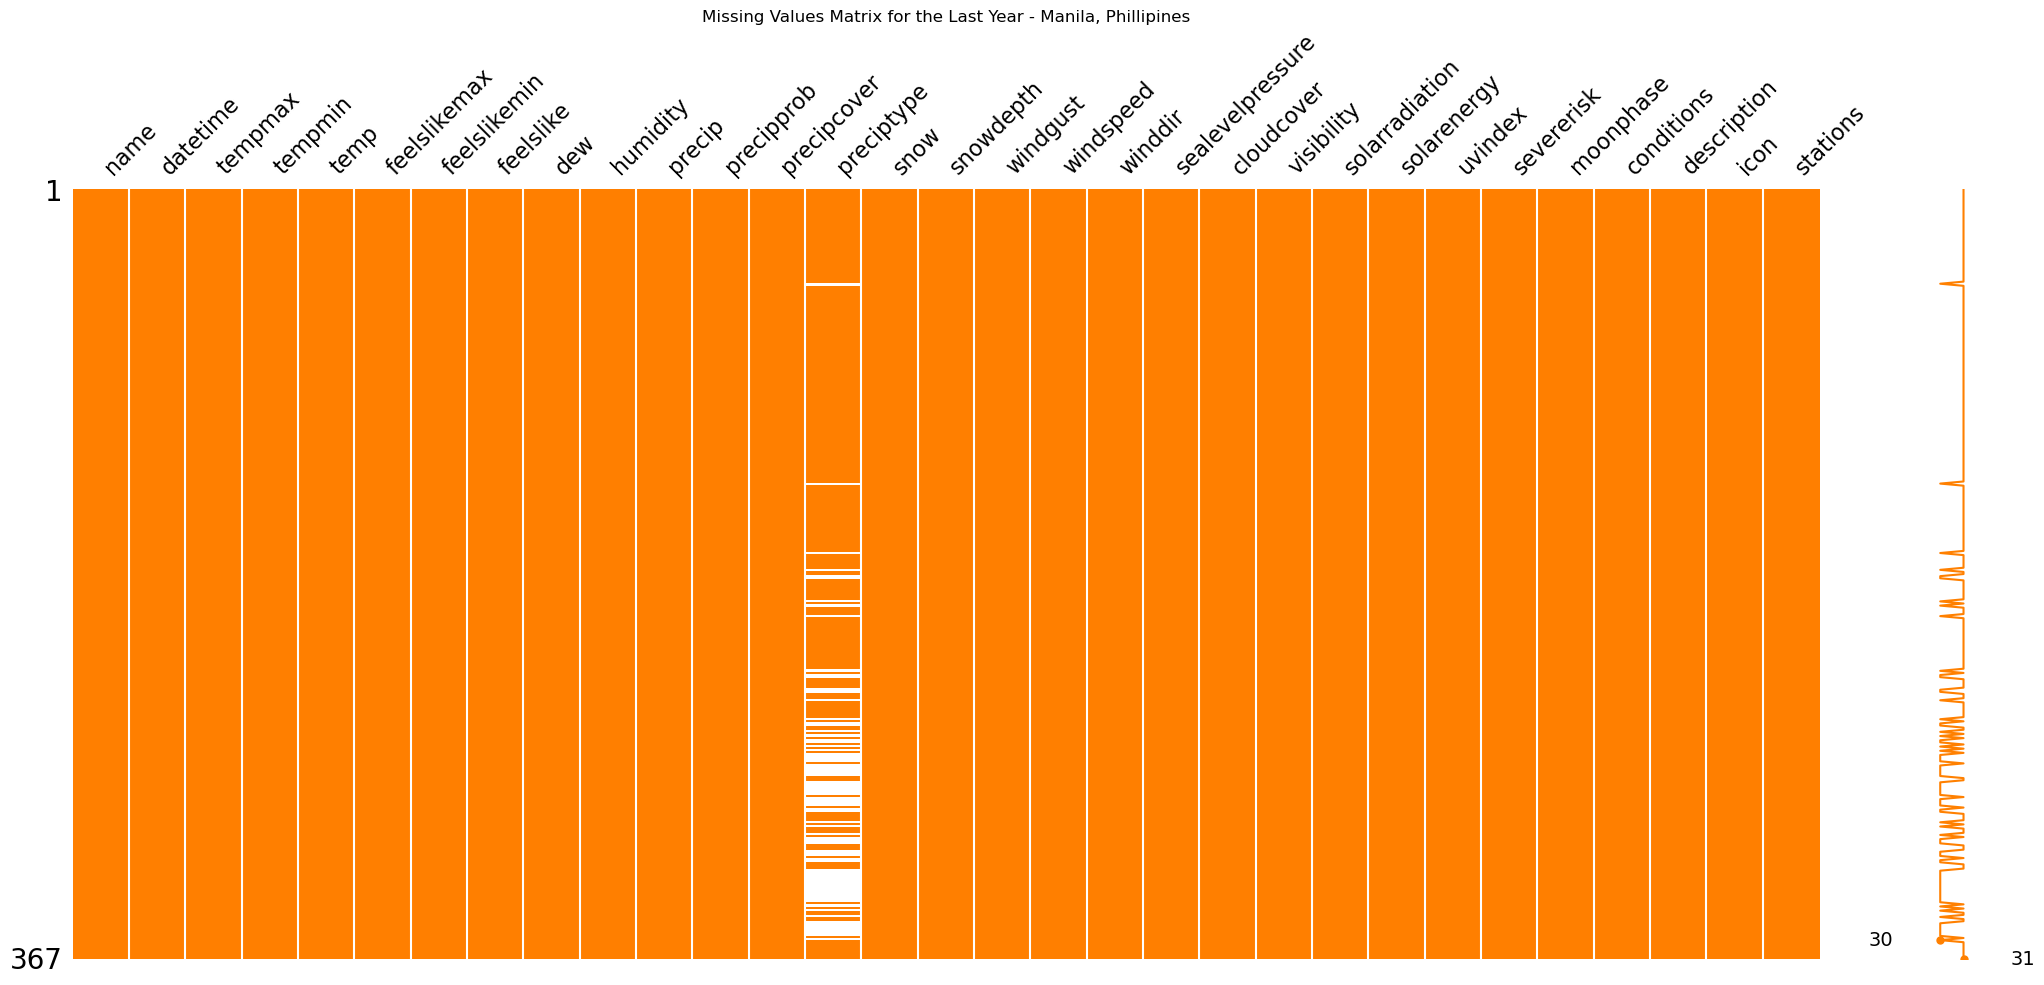

In [34]:
import missingno as msno

df_manila['datetime'] = pd.to_datetime(df_manila['datetime'])

last_year = df_manila['datetime'].max() - pd.DateOffset(years=1)
df_last_year = df_manila[df_manila['datetime'] >= last_year]

msno.matrix(df_last_year, color=(1.0, 0.5, 0.0))
plt.title('Missing Values Matrix for the Last Year - Manila, Phillipines')
plt.show()

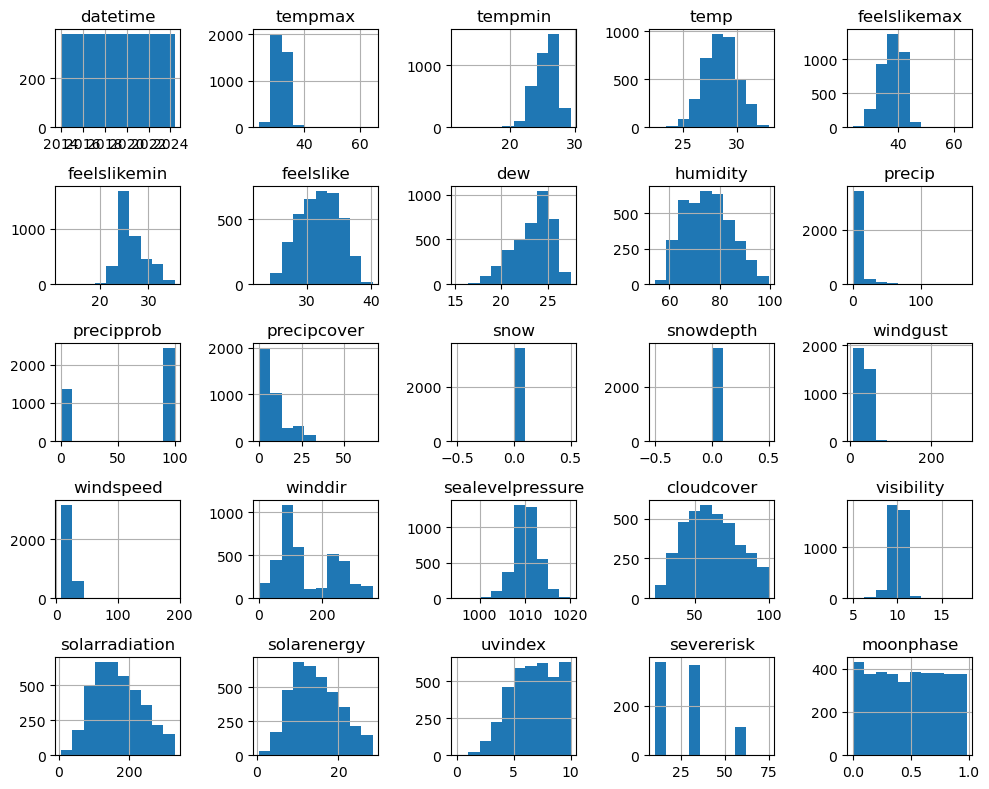

In [35]:
df_manila.hist(figsize=(10, 8))
plt.tight_layout()
plt.show()

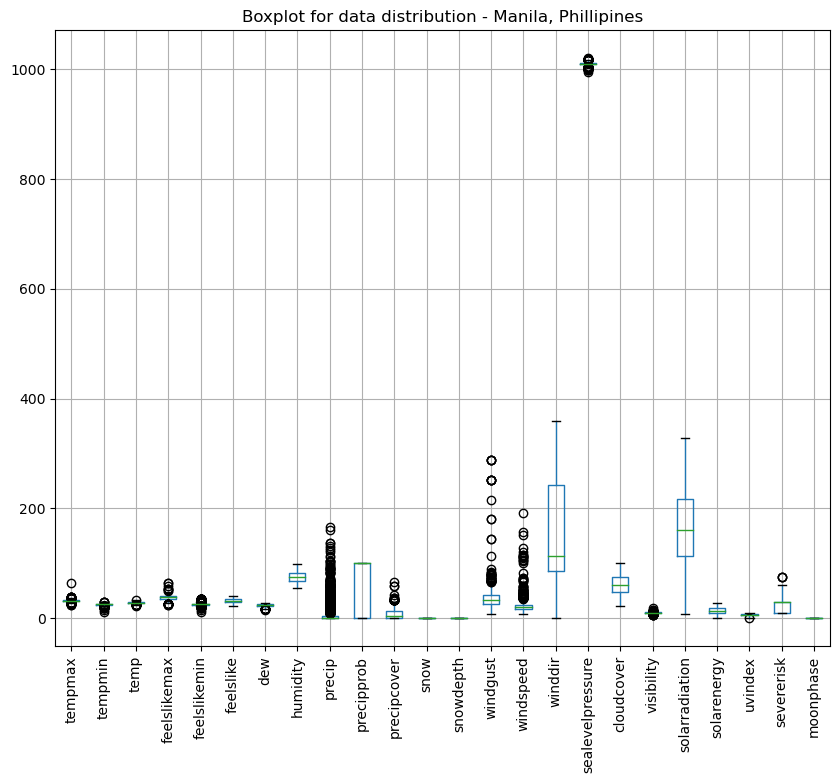

In [36]:
df_manila.boxplot(figsize=(10, 8))
plt.xticks(rotation=90)
plt.title('Boxplot for data distribution - Manila, Phillipines')
plt.show()

In [37]:
corr_matrix = df_manila.corr()
print(corr_matrix) 

                   tempmax   tempmin      temp  feelslikemax  feelslikemin  \
tempmax           1.000000  0.531833  0.857919      0.734636      0.516196   
tempmin           0.531833  1.000000  0.782801      0.658114      0.915275   
temp              0.857919  0.782801  1.000000      0.803989      0.749019   
feelslikemax      0.734636  0.658114  0.803989      1.000000      0.622761   
feelslikemin      0.516196  0.915275  0.749019      0.622761      1.000000   
feelslike         0.706065  0.807222  0.917147      0.892892      0.795684   
dew               0.120383  0.527212  0.354716      0.653242      0.461871   
humidity         -0.470913 -0.024412 -0.343982      0.091413     -0.068306   
precip           -0.234015 -0.099843 -0.209983     -0.011644     -0.115251   
precipprob       -0.186091  0.101496 -0.086231      0.175619      0.064684   
precipcover      -0.361348 -0.033705 -0.277852      0.031192     -0.074128   
snow                   NaN       NaN       NaN           NaN    

C:\Users\nicol\AppData\Local\Temp\ipykernel_33476\3710571630.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df_manila.corr()


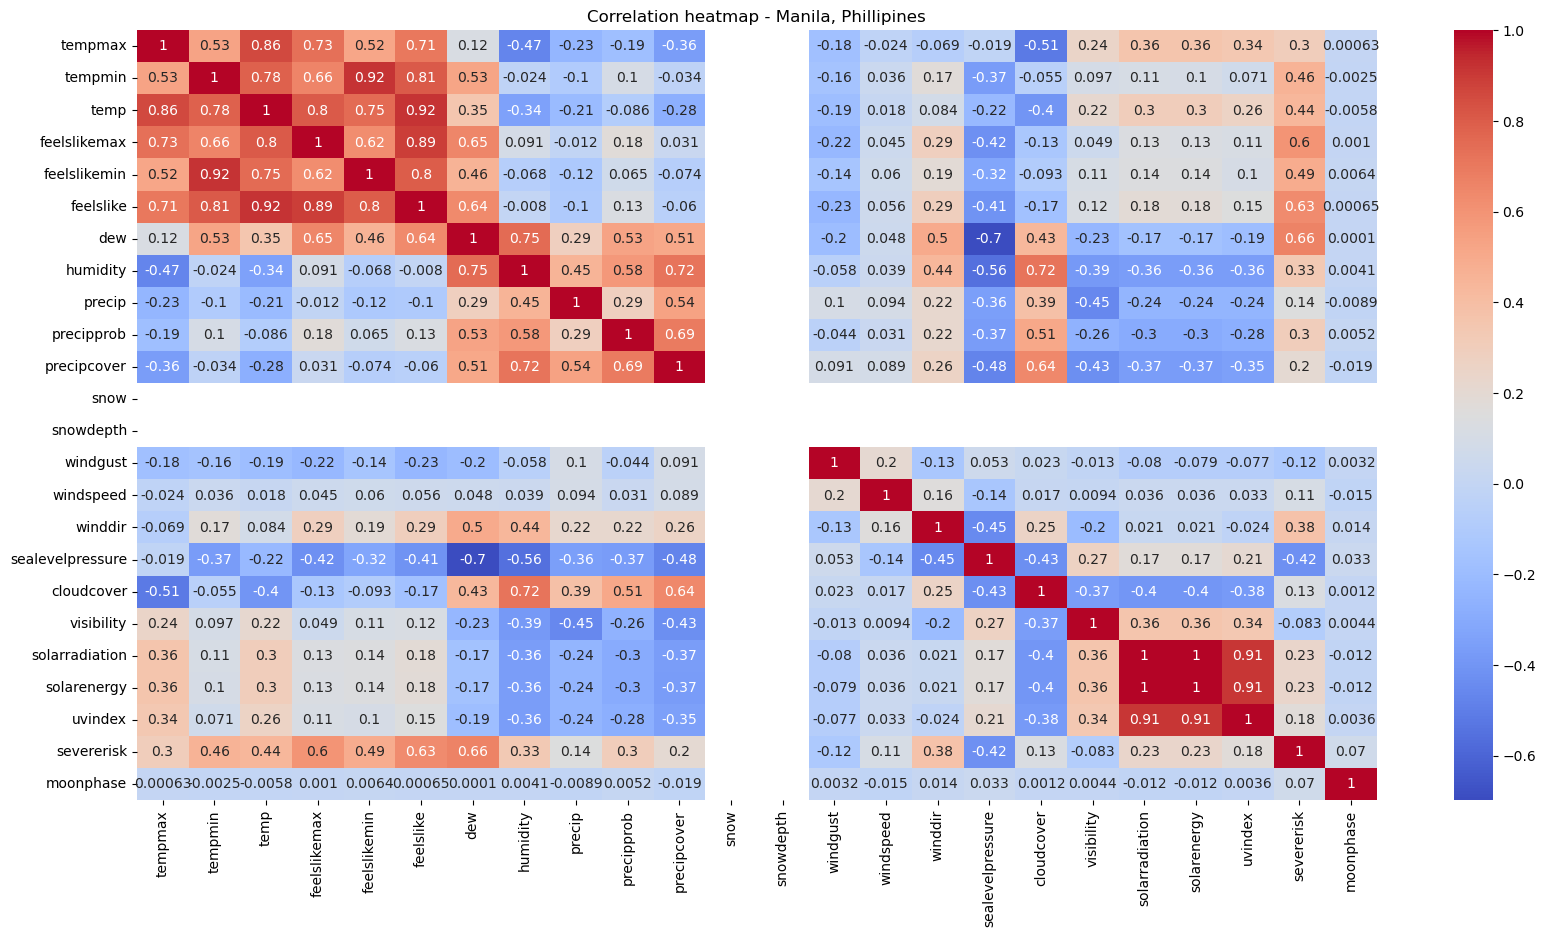

In [38]:
import seaborn as sns
plt.figure(figsize=(20, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation heatmap - Manila, Phillipines")
plt.show()

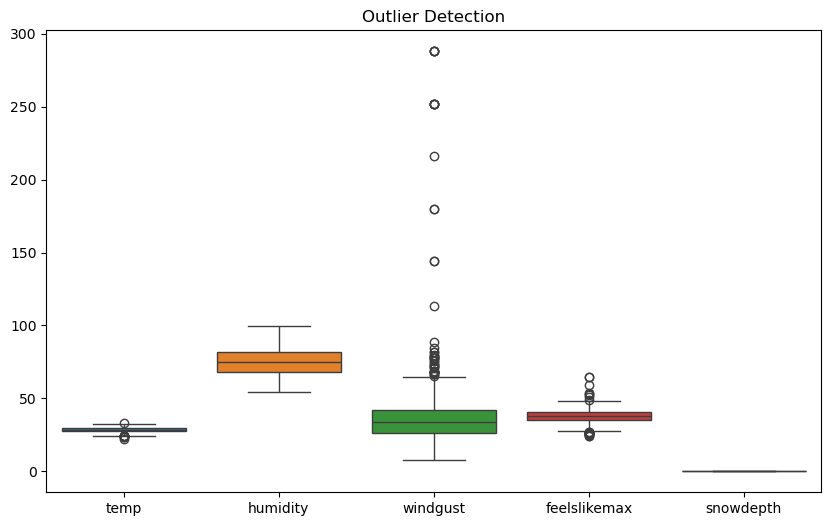

In [39]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_manila[['temp', 'humidity', 'windgust', 'feelslikemax', 'snowdepth']])
plt.title("Outlier Detection")
plt.show()

## Missing values

In [40]:
df_manila.isna().sum()

name                   0
datetime               0
tempmax                0
tempmin                0
temp                   0
feelslikemax           0
feelslikemin           0
feelslike              0
dew                    0
humidity               0
precip                 0
precipprob             0
precipcover            0
preciptype          1273
snow                 365
snowdepth            365
windgust             308
windspeed              0
winddir                0
sealevelpressure       0
cloudcover             0
visibility             0
solarradiation         0
solarenergy            0
uvindex                0
severerisk          2931
moonphase              0
conditions             0
description            0
icon                   0
stations               0
dtype: int64

In [41]:
#run k-nn to fill in the missing values with the k nearest neighbour 
#https://www.sciencedirect.com/science/article/abs/pii/S0164121212001586#:~:text=kNN%20imputation%20is%20designed%20to,or%20attribute)%20is%20categorical%2C%20referred

imputer = KNNImputer(n_neighbors=5)
df_manila[['windgust', 'severerisk']] = imputer.fit_transform(df_manila[['windgust', 'severerisk']])


In [42]:
df_manila.isna().sum()

name                   0
datetime               0
tempmax                0
tempmin                0
temp                   0
feelslikemax           0
feelslikemin           0
feelslike              0
dew                    0
humidity               0
precip                 0
precipprob             0
precipcover            0
preciptype          1273
snow                 365
snowdepth            365
windgust               0
windspeed              0
winddir                0
sealevelpressure       0
cloudcover             0
visibility             0
solarradiation         0
solarenergy            0
uvindex                0
severerisk             0
moonphase              0
conditions             0
description            0
icon                   0
stations               0
dtype: int64

In [43]:
#filling in missing values from precipitation and snow because if they are missing, it means there was no registration of snow or precipitation that day

df_manila['preciptype'] = df_manila['preciptype'].fillna(0)
df_manila['snow'] = df_manila['snow'].fillna(0)
df_manila['snowdepth'] = df_manila['snowdepth'].fillna(0)

In [44]:
df_manila.isna().sum()

name                0
datetime            0
tempmax             0
tempmin             0
temp                0
feelslikemax        0
feelslikemin        0
feelslike           0
dew                 0
humidity            0
precip              0
precipprob          0
precipcover         0
preciptype          0
snow                0
snowdepth           0
windgust            0
windspeed           0
winddir             0
sealevelpressure    0
cloudcover          0
visibility          0
solarradiation      0
solarenergy         0
uvindex             0
severerisk          0
moonphase           0
conditions          0
description         0
icon                0
stations            0
dtype: int64

## Droppping unnecessary columns

In [45]:
# based on the heatmap, it seems that columns like tempmax, tempin, feelslikemax, feelslikemin and feelslike are too similar with the target variable and they are being dropped as to not create any data leakage in the models to follow

In [46]:
# reference multi colinearity

In [47]:
columns_to_drop = ['tempmax', 'tempmin', 'icon', 'stations', 'conditions', 'tempmin', 'feelslikemax', 'feelslikemin', 'feelslike', 'preciptype', 'name']
df_manila = df_manila.drop(columns=columns_to_drop)

## Tokenization of the "description" column

In [48]:
# step 1: text processing
tokenizer = CountVectorizer()
hashingTF = TfidfTransformer(use_idf=False)
idf = TfidfTransformer(use_idf=True)
k = 6
kmeans = KMeans(n_clusters=k, random_state=42)

In [49]:
# pipeline that processes text and then clusters
pipeline = Pipeline(steps=[
    ('tokenizer', tokenizer),
    ('hashingTF', hashingTF),
    ('idf', idf),
    ('kmeans', kmeans)
])

In [50]:
# fitting the model on the 'description' column
text_features = pipeline.fit_transform(df_manila['description'])

C:\Users\nicol\anaconda3\envs\AI2023\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [51]:
kmeans.labels_
df_manila['clusters_description'] = kmeans.labels_

In [52]:
df_manila['clusters_description'].value_counts()

1    1316
2    1037
3     486
4     418
0     288
5     248
Name: clusters_description, dtype: int64

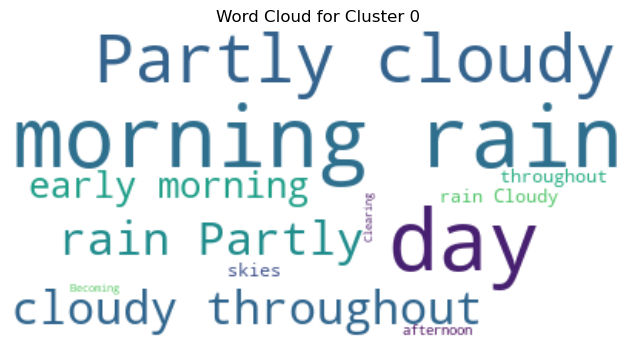

In [53]:
text = ' '.join(description for description in df_manila[df_manila['clusters_description']==0]['description'])
wordcloud = WordCloud(background_color='white').generate(text)
plt.figure(figsize=(8, 4))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Cluster 0')
plt.show()

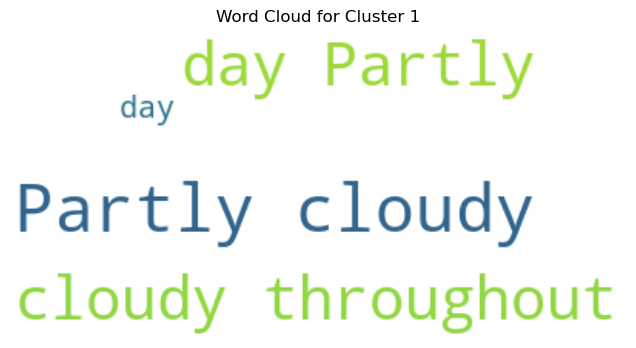

In [54]:
text = ' '.join(description for description in df_manila[df_manila['clusters_description']==1]['description'])
wordcloud = WordCloud(background_color='white').generate(text)
plt.figure(figsize=(8, 4))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Cluster 1')
plt.show()

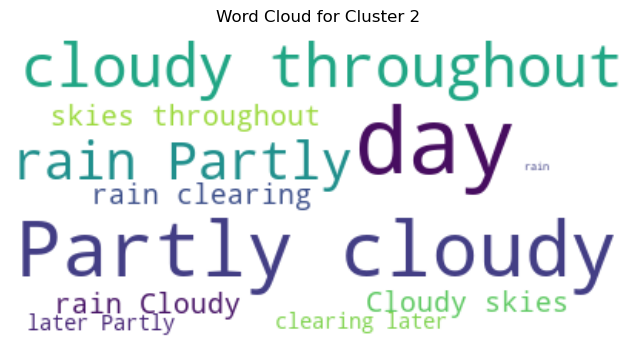

In [55]:
text = ' '.join(description for description in df_manila[df_manila['clusters_description']==2]['description'])
wordcloud = WordCloud(background_color='white').generate(text)
plt.figure(figsize=(8, 4))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Cluster 2')
plt.show()

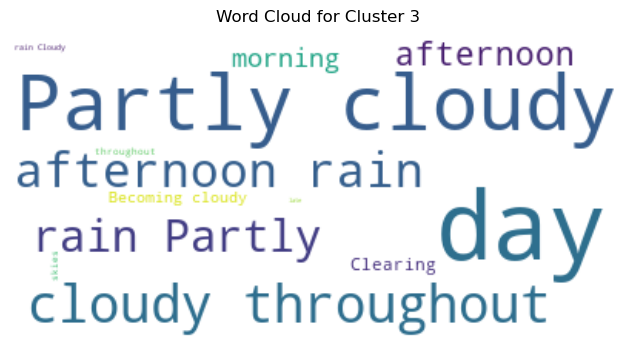

In [56]:
text = ' '.join(description for description in df_manila[df_manila['clusters_description']==3]['description'])
wordcloud = WordCloud(background_color='white').generate(text)
plt.figure(figsize=(8, 4))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Cluster 3')
plt.show()

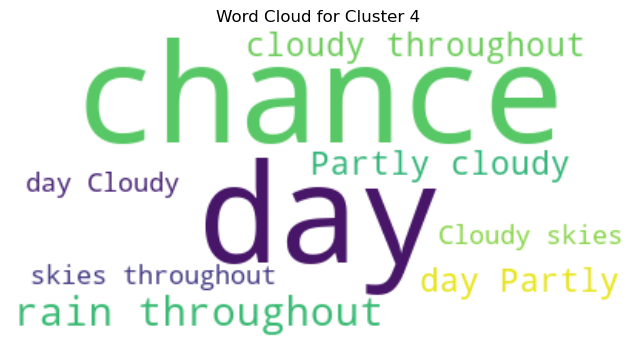

In [57]:
text = ' '.join(description for description in df_manila[df_manila['clusters_description']==4]['description'])
wordcloud = WordCloud(background_color='white').generate(text)
plt.figure(figsize=(8, 4))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Cluster 4')
plt.show()

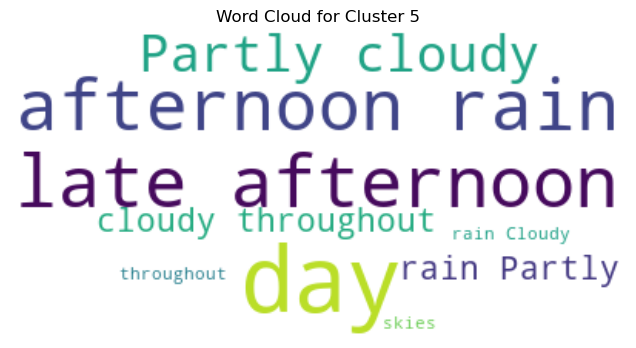

In [58]:
text = ' '.join(description for description in df_manila[df_manila['clusters_description']==5]['description'])
wordcloud = WordCloud(background_color='white').generate(text)
plt.figure(figsize=(8, 4))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Cluster 5')
plt.show()

In [59]:
df_manila = df_manila.drop(columns=['description'])
df_manila.head(2)

,datetime,temp,dew,humidity,precip,precipprob,precipcover,snow,snowdepth,windgust,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,severerisk,moonphase,clusters_description
0,2014-01-01,26.6,20.4,70.1,0.0,0,0.0,0.0,0.0,35.457647,22.3,98.4,1013.2,47.6,8.8,209.0,18.0,8,25.423434,0.00,1
1,2014-01-02,27.0,20.0,66.2,0.0,0,0.0,0.0,0.0,35.457647,20.5,100.4,1012.9,45.4,10.2,223.6,19.1,8,25.423434,0.02,1


## Xgboost baseline with all features 
### Lagged features

In [60]:
#shifting the features by 3 days

In [61]:
# this shifts all features by three days except the temp, and then it merges them back togther
df_manila_shifted = df_manila.drop('temp', axis=1).shift(3)

In [62]:
df_manila_eng = pd.concat([df_manila['temp'], df_manila_shifted], axis=1)

In [63]:
# adding back the last three rows, which have all the shifted features but without the temp for them as that is what we predict
last_three = df_manila_shifted.tail(3)
last_three.set_index( pd.date_range(start=max(df_manila.index)+pd.Timedelta(days=1), periods=3, freq='D'))


TypeError: unsupported operand type(s) for +: 'int' and 'Timedelta'

In [ ]:
max(df_manila.index)+pd.Timedelta(days=1)

In [ ]:
df_manila_final = pd.concat([df_manila_eng, last_three], ignore_index=True)

In [ ]:
df_manila_final = df_manila_final.set_index(pd.date_range(start=min(df_manila.index), periods=len(df_manila)+3, freq='D'))

In [ ]:
df_manila_final.tail()

In [ ]:
# we've created three new dates with all the lagged features aside from temp, which will be predicted in the next section

## Download of updated dataframe

In [ ]:
# folder_path = r'C:\Users\nicol\OneDrive\Master\Goldsmiths\Thesis\weather-prediction\data'
# file_name = 'manila_weather_2014-2024_updated.csv'
# full_path = os.path.join(folder_path, file_name)

# # save the DataFrame to the specified path
# df_manila.to_csv(full_path)